* _In this code we encounter a case of an imbalanced dataset_

In [272]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Extraction #

In [274]:
train = pd.read_csv('./train.csv', index_col='id')
y = train.Status
#train = train.drop('Status', axis=1)

In [275]:
train

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D


In [276]:
test = pd.read_csv('./test.csv', index_col='id')
test

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,,,,,,,,,,,,,,,,,,
7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0


In [277]:
y

id
0       D
1       C
2       D
3       C
4       C
       ..
7900    C
7901    C
7902    D
7903    D
7904    C
Name: Status, Length: 7905, dtype: object

In [278]:
df = pd.concat([train.drop('Status', axis=1), test], axis=0)

In [279]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13176 entries, 0 to 13175
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         13176 non-null  int64  
 1   Drug           13176 non-null  object 
 2   Age            13176 non-null  int64  
 3   Sex            13176 non-null  object 
 4   Ascites        13176 non-null  object 
 5   Hepatomegaly   13176 non-null  object 
 6   Spiders        13176 non-null  object 
 7   Edema          13176 non-null  object 
 8   Bilirubin      13176 non-null  float64
 9   Cholesterol    13176 non-null  float64
 10  Albumin        13176 non-null  float64
 11  Copper         13176 non-null  float64
 12  Alk_Phos       13176 non-null  float64
 13  SGOT           13176 non-null  float64
 14  Tryglicerides  13176 non-null  float64
 15  Platelets      13176 non-null  float64
 16  Prothrombin    13176 non-null  float64
 17  Stage          13176 non-null  float64
dtypes: flo

# Data Visualization #

C     4965
D     2665
CL     275
Name: Status, dtype: int64


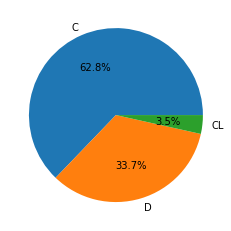

In [281]:
plt.pie( y.value_counts() ,  autopct='%1.1f%%', labels=y.value_counts().index )
print( y.value_counts() )

Because we are dealing with an imbalance dataset we will downsample our test data

In [282]:
from sklearn.utils import resample

In [283]:
sample_CL = train[y=='CL']
sample_C = train[y=='C']
sample_D = train[y=='D']

In [284]:
sample_C_downsampled = resample(sample_C, replace=False, n_samples=275)
sample_D_downsampled = resample(sample_D, replace=False, n_samples=275)
sample_CL_upsampled = resample(sample_CL, replace=True, n_samples=275)

In [285]:
train_resampled = pd.concat([sample_C_downsampled, sample_D_downsampled, sample_CL_upsampled])
y = train_resampled.Status
train = train_resampled.drop('Status', axis=1)

C     275
D     275
CL    275
Name: Status, dtype: int64


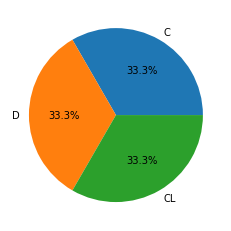

In [286]:
plt.pie( y.value_counts() ,  autopct='%1.1f%%', labels=y.value_counts().index )
print( y.value_counts() )

## Converting data types ##

In [287]:
list(df.select_dtypes(include='object').columns)

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [288]:
def converting(data):
    dummies = pd.get_dummies( data.select_dtypes(include='object'), drop_first=True )
    object_columns = list( data.select_dtypes(include='object').columns )
    data = data.drop( object_columns , axis=1 )
    data_dummies = pd.concat( [data, dummies], axis=1 )
    return data_dummies

In [289]:
df_dummies = converting(df)
df_dummies

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
id,,,,,,,,,,,,,,,,,,,
0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,0,1,0,0,0,0,0
1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,1,0,0,0,0,0,0
2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,1,0,0,1,1,0,1
3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,1,0,0,0,0,0,0
4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,2870,12279,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0,1,0,0,0,0,0,0
13172,1770,24803,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0,1,0,0,0,0,0,0
13173,3707,16990,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0,0,0,0,1,0,0,0


In [290]:
train_dummies = converting(train)
test_dummies = converting(test)

## Correlations in between the data ##

<AxesSubplot:>

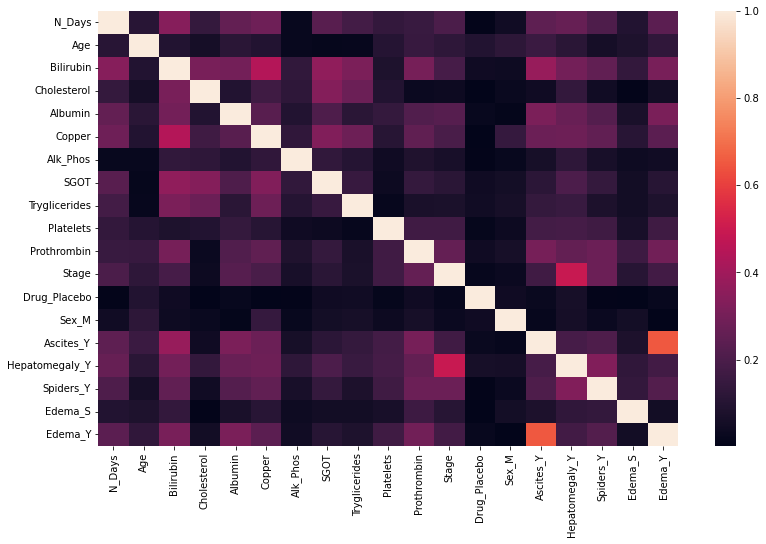

In [291]:
plt.figure( figsize=(13,8) )
sns.heatmap( abs(df_dummies.corr()) )

## Outliers ##

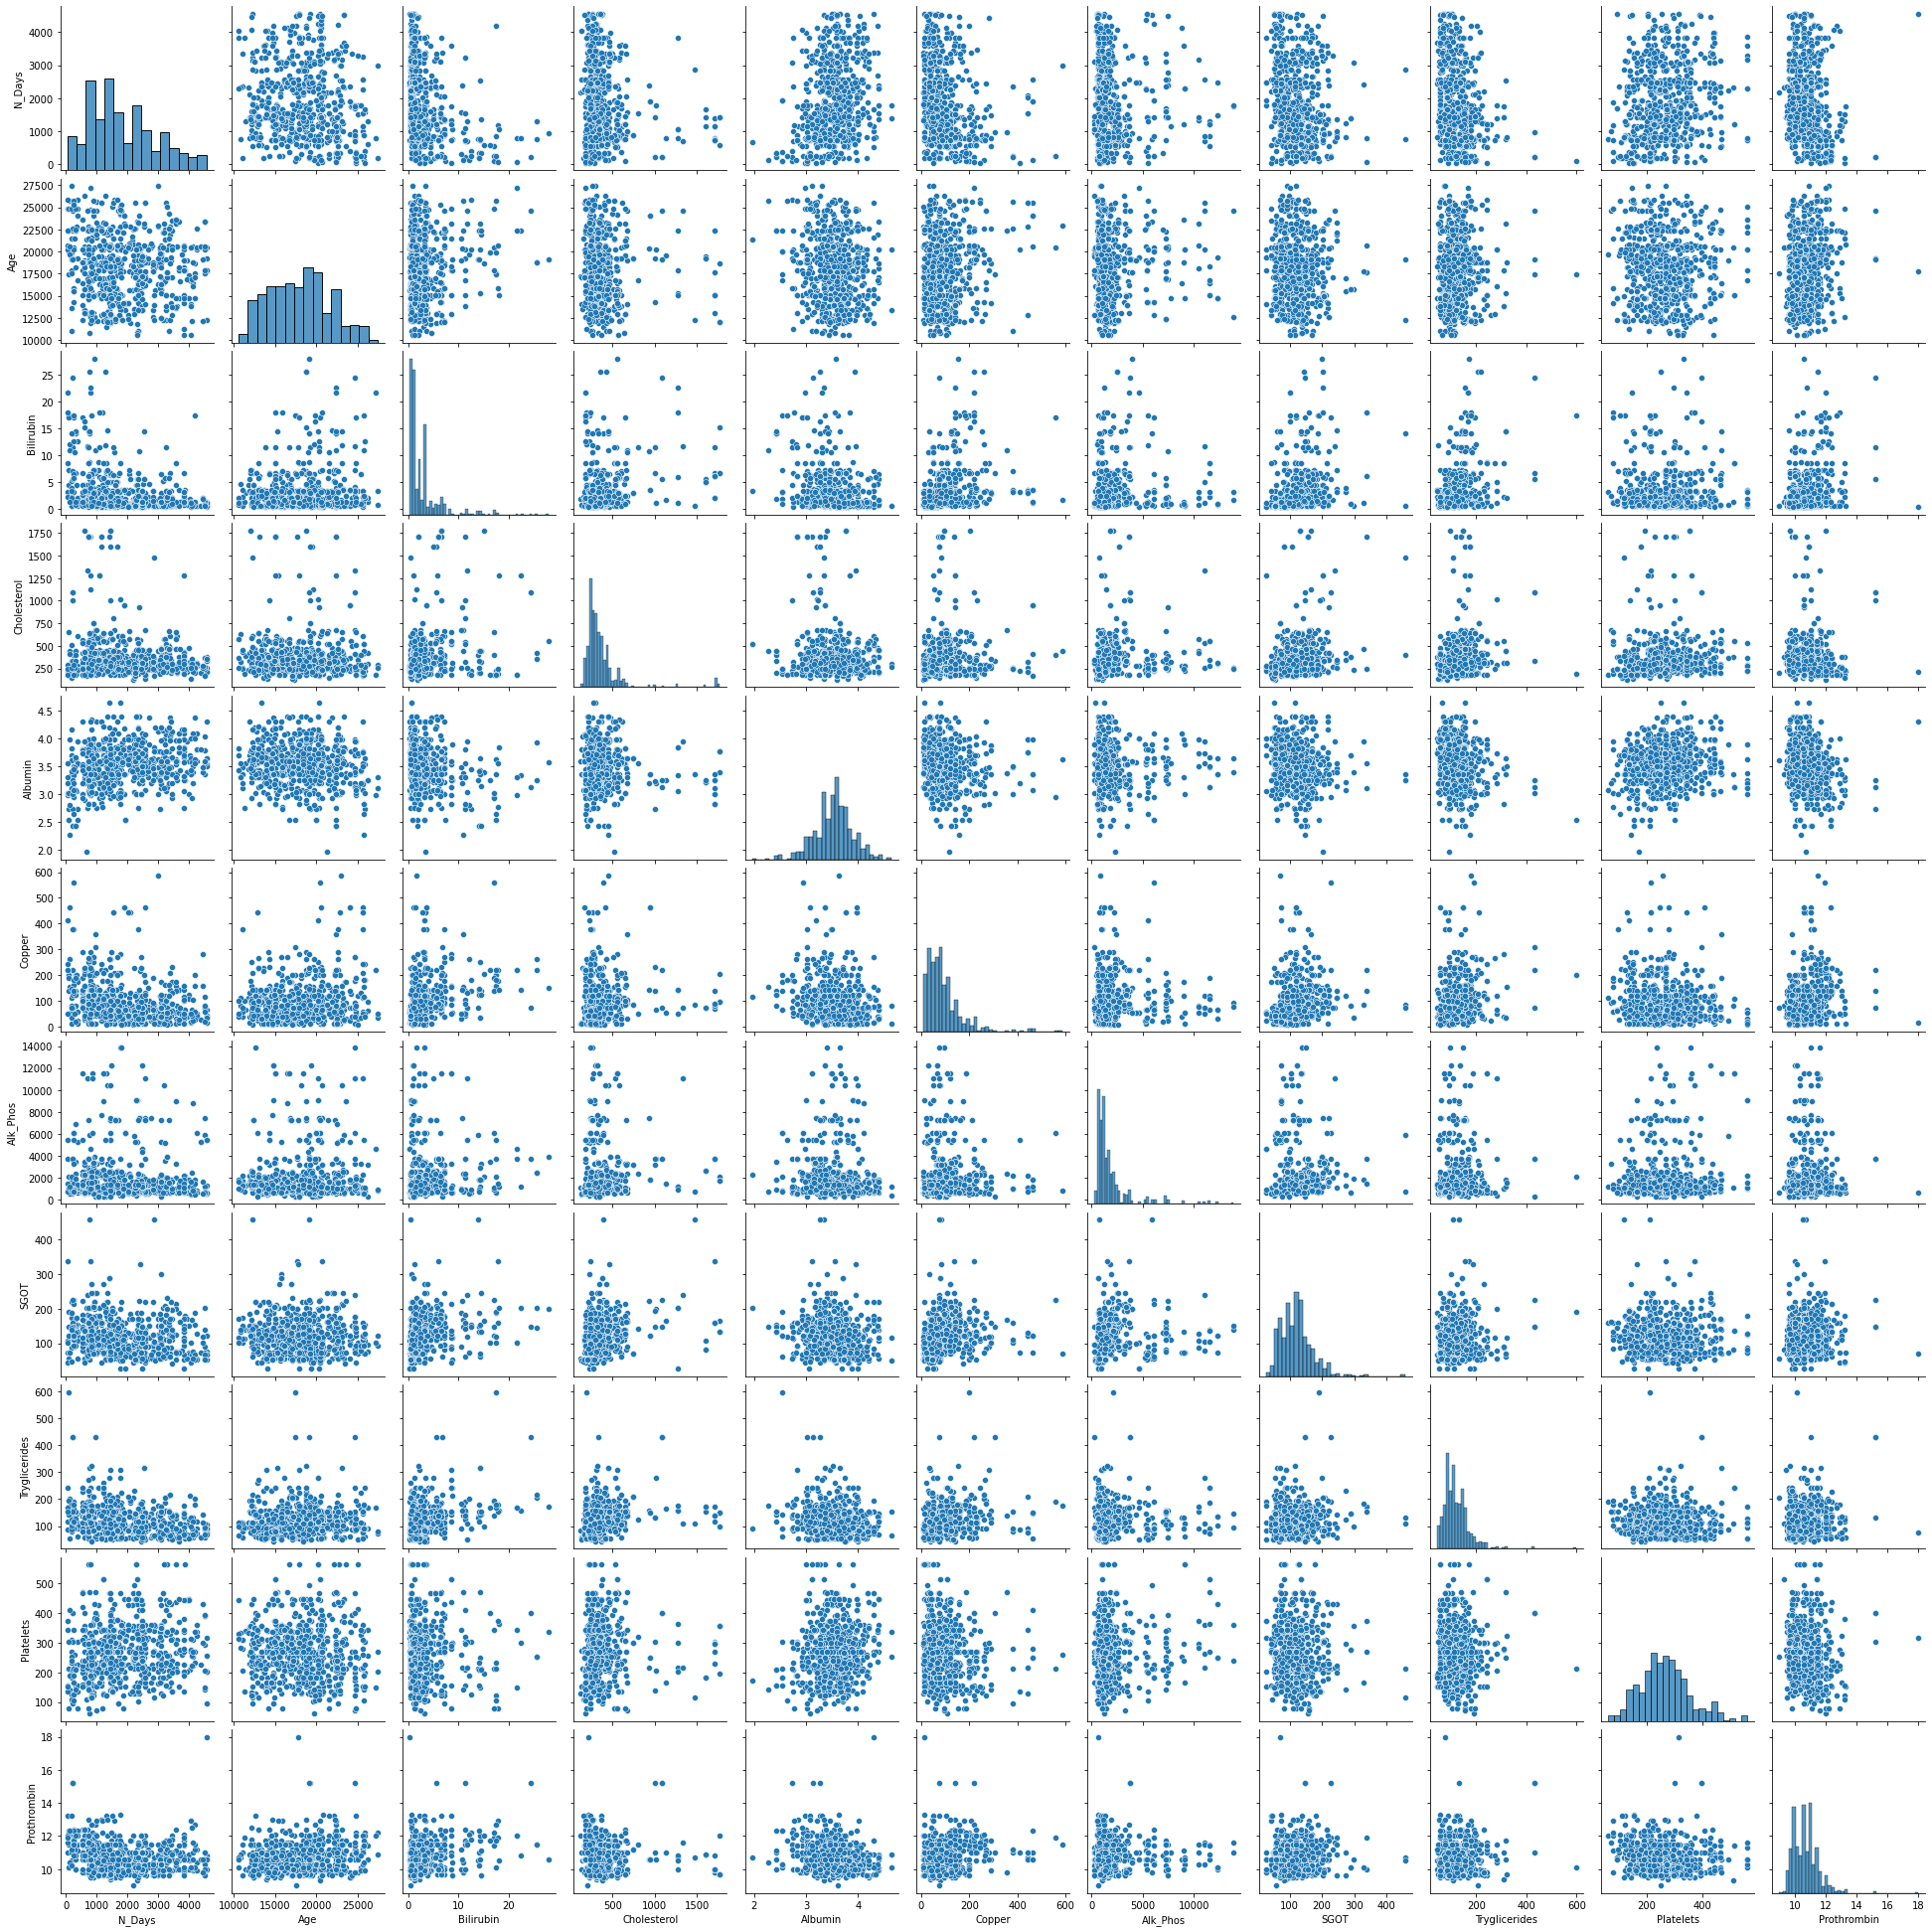

In [292]:
sns.pairplot( data= train_dummies.select_dtypes(exclude='object').iloc[:,0:11] )

<AxesSubplot:xlabel='Age', ylabel='SGOT'>

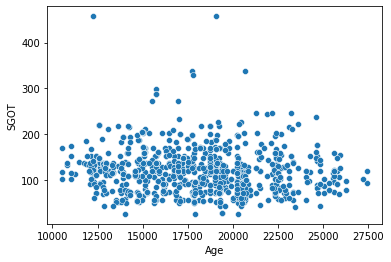

In [293]:
sns.scatterplot(y=train_dummies.SGOT, x=train_dummies.Age)

In [294]:
outliers_1 = list( train_dummies[ (train_dummies.SGOT > 400) ].index )

In [295]:
train_dummies = train_dummies.drop( outliers_1 , axis=0)

<AxesSubplot:xlabel='Bilirubin', ylabel='Tryglicerides'>

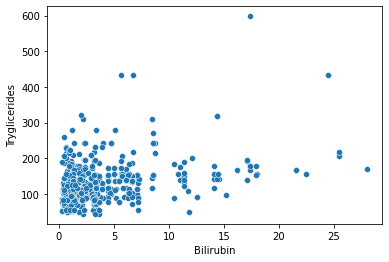

In [296]:
sns.scatterplot( y = train_dummies.Tryglicerides, x = train_dummies.Bilirubin)

In [297]:
outliers_2 = list( train_dummies[ (train_dummies.Tryglicerides > 350) ].index )

In [298]:
train_dummies = train_dummies.drop( outliers_2 , axis=0)

<AxesSubplot:xlabel='Albumin', ylabel='Prothrombin'>

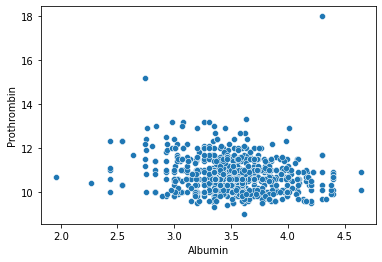

In [299]:
sns.scatterplot( y=train_dummies.Prothrombin, x=train_dummies.Albumin )

In [300]:
outliers_3 = list( train_dummies[ (train_dummies.Prothrombin > 15) ].index )

In [301]:
train_dummies = train_dummies.drop( outliers_3 , axis=0)

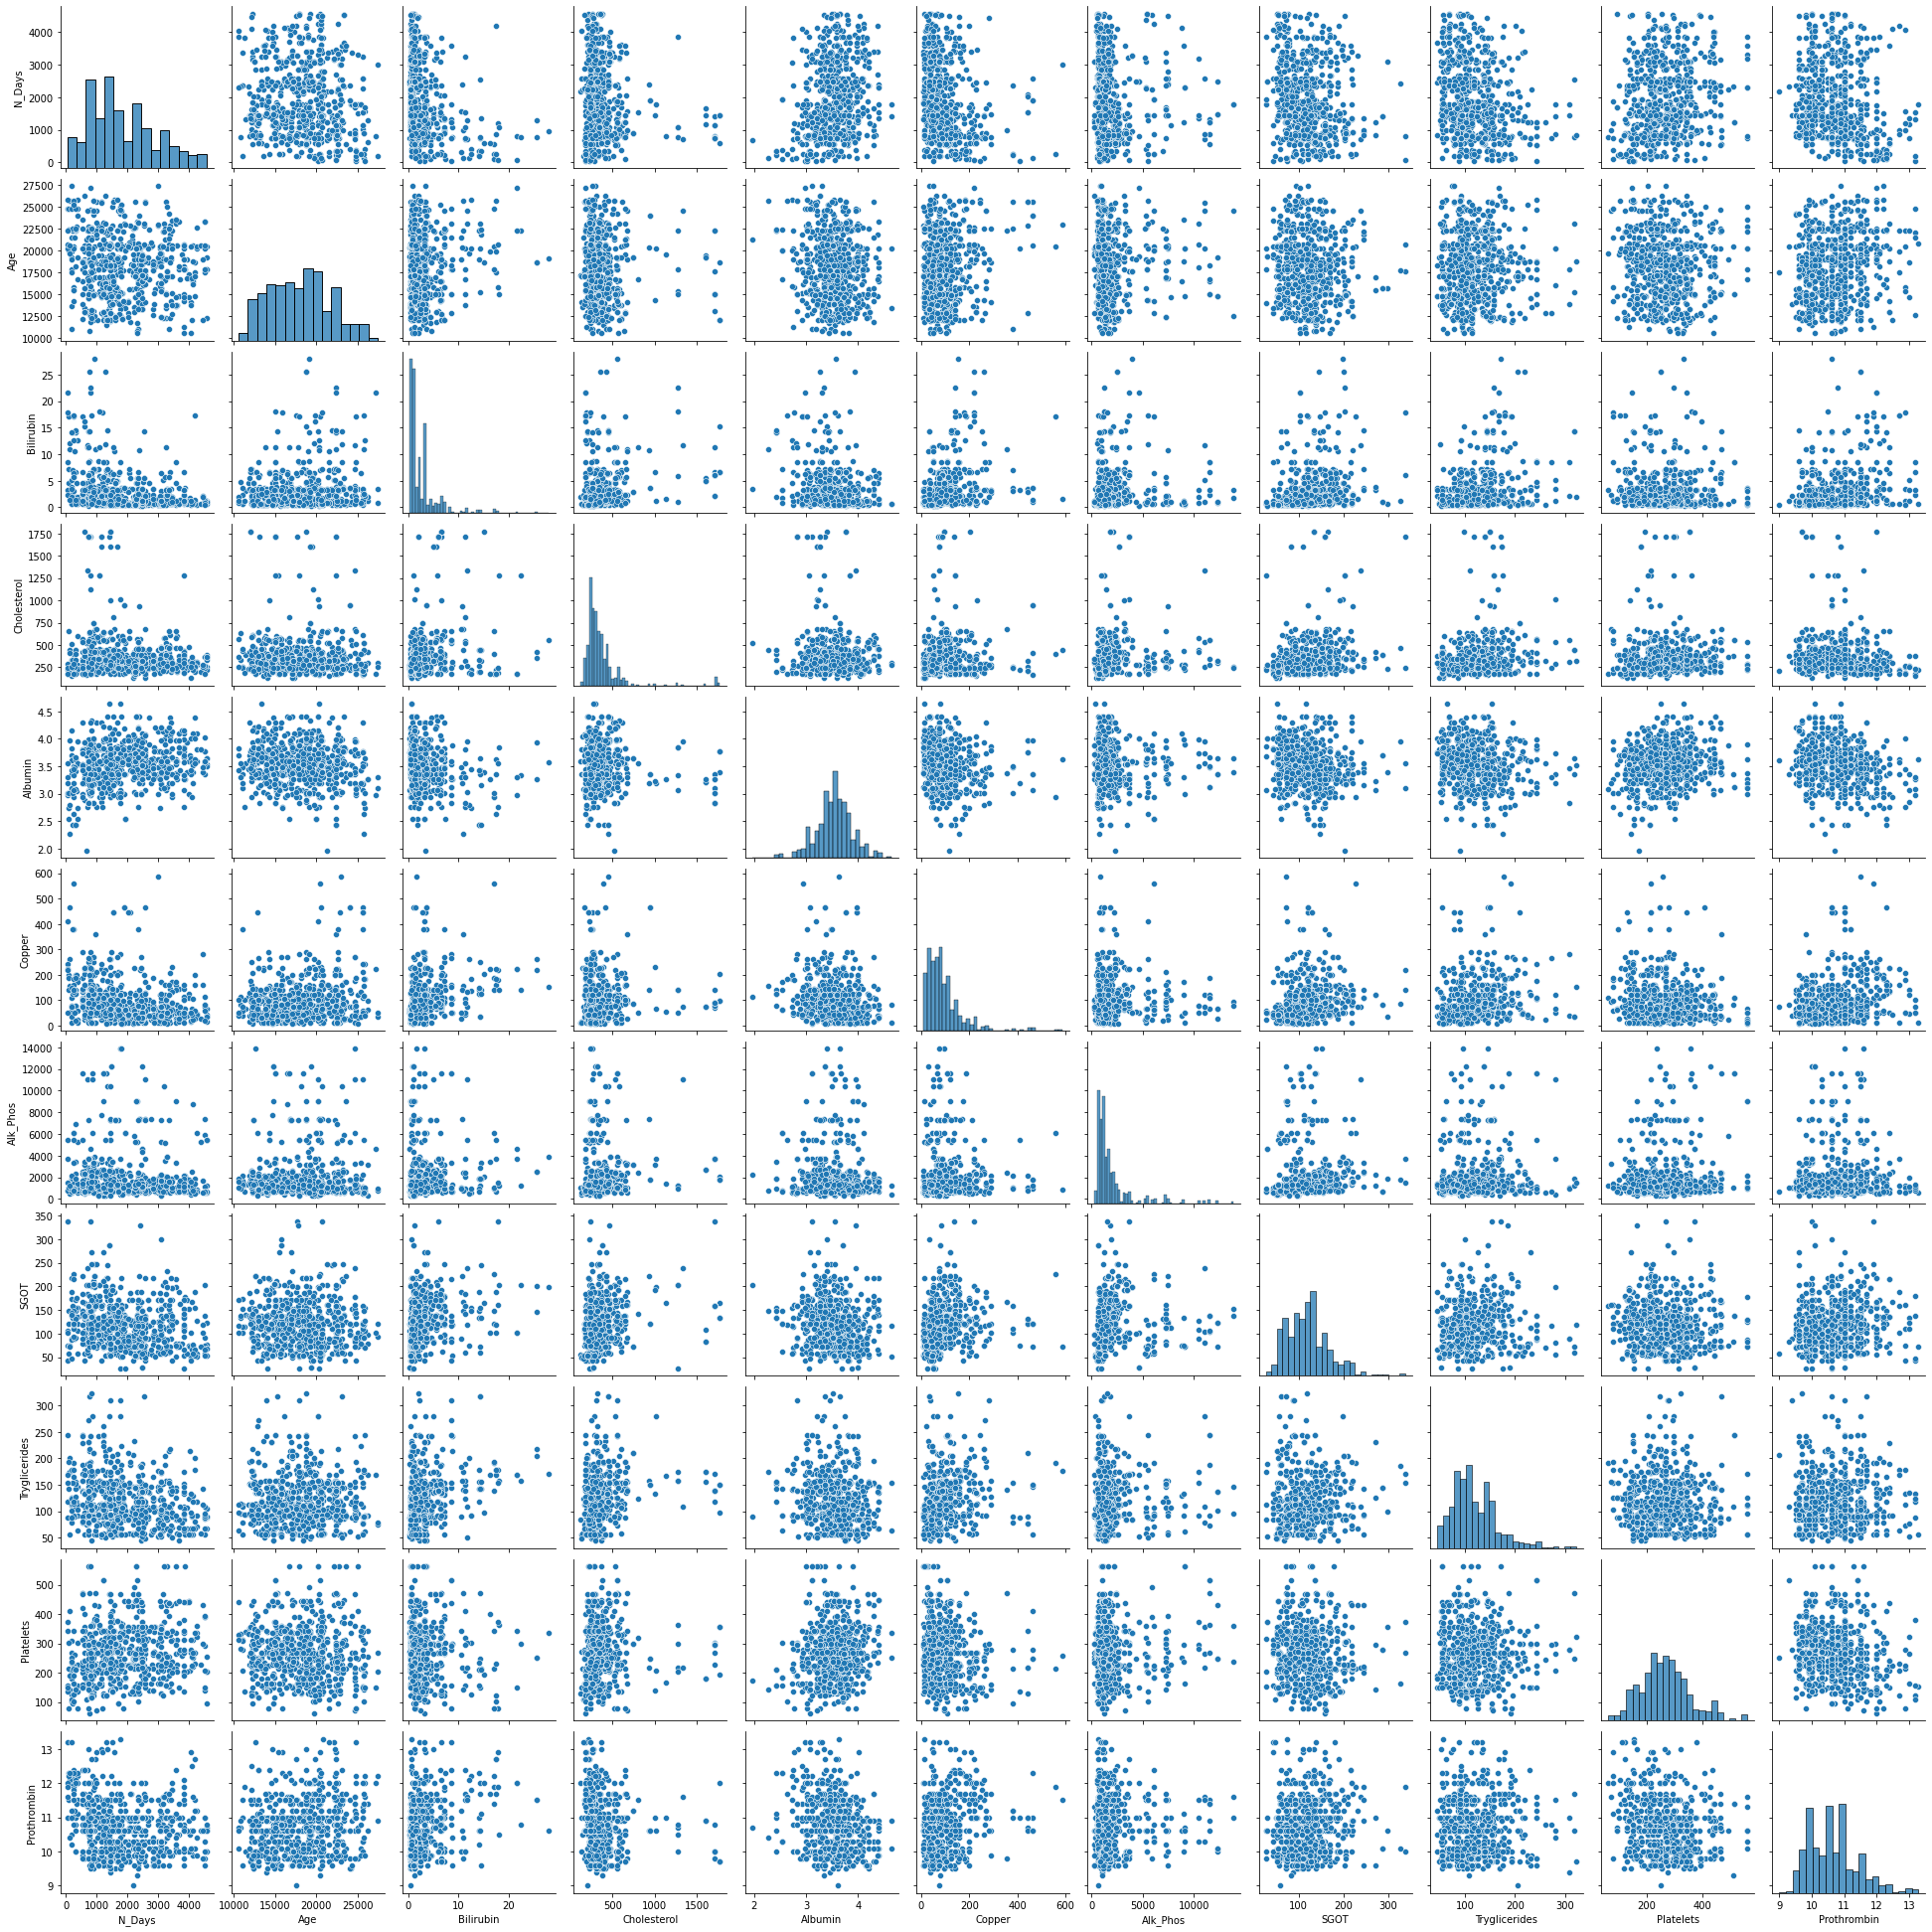

In [302]:
sns.pairplot( data= train_dummies.select_dtypes(exclude='object').iloc[:,0:11] )

In [303]:
y = y.drop( outliers_1 + outliers_2 + outliers_3 , axis=0 )

In [304]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [305]:
le.inverse_transform(y)

array(['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C

# Missing data #

In [306]:
df_dummies.isnull().sum()

N_Days            0
Age               0
Bilirubin         0
Cholesterol       0
Albumin           0
Copper            0
Alk_Phos          0
SGOT              0
Tryglicerides     0
Platelets         0
Prothrombin       0
Stage             0
Drug_Placebo      0
Sex_M             0
Ascites_Y         0
Hepatomegaly_Y    0
Spiders_Y         0
Edema_S           0
Edema_Y           0
dtype: int64

# Train Test Split #

In [307]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split( train_dummies, y, test_size=0.10, random_state=42)

# Normalization of the data #

In [308]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform( X_train )
X_valid_scaled = scaler.transform( X_valid )
X_test_scaled = scaler.transform ( test_dummies )

# Model XGB #

In [325]:
from xgboost import XGBClassifier

model_XBG = XGBClassifier(n_estimators=10, learning_rate=0.3, n_jobs=2)

In [326]:
model_XBG.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=2, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [338]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, log_loss

def display(model, X_test, y_test):
    prediction = model.predict(X_test)
    prediction_proba = model.predict_proba(X_test)
    matrix = confusion_matrix(y_true=y_test, y_pred=prediction)
    print(classification_report(y_pred=prediction, y_true=y_test))
    print( f'The log loss is {log_loss(y_true=y_test, y_pred=prediction_proba)}')
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    disp.plot()
    plt.show()


              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.81      0.93      0.87        28
           2       0.86      0.86      0.86        22

    accuracy                           0.87        82
   macro avg       0.87      0.87      0.87        82
weighted avg       0.87      0.87      0.87        82

The log loss is 0.5340144483394279


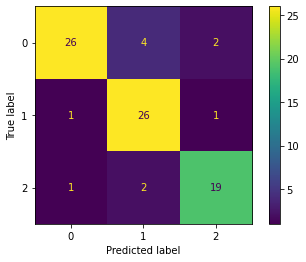

In [339]:
display(model_XBG, X_valid_scaled, y_valid)

# Model Random Forrest #

In [340]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=200, max_features='sqrt',criterion='gini')

In [341]:
model_RF.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.83      0.86      0.84        28
           2       0.83      0.91      0.87        22

    accuracy                           0.84        82
   macro avg       0.84      0.85      0.84        82
weighted avg       0.84      0.84      0.84        82

The log loss is 0.5256444356329149


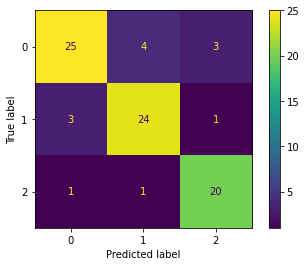

In [342]:
display(model_RF, X_valid_scaled, y_valid)

In [343]:
final_prediction = model_XBG.predict_proba(X_test_scaled)

In [344]:
final_prediction

array([[0.429509  , 0.20881182, 0.36167923],
       [0.07423638, 0.8387833 , 0.08698037],
       [0.2728827 , 0.13016297, 0.59695435],
       ...,
       [0.48421866, 0.14811206, 0.36766934],
       [0.71615916, 0.24277622, 0.04106458],
       [0.2797251 , 0.0959131 , 0.6243618 ]], dtype=float32)

In [345]:
submission = pd.DataFrame(index=test.index, data=final_prediction, columns=['Status_C', 'Status_CL', 'Status_D'] )

In [346]:
submission

,Status_C,Status_CL,Status_D
id,,,
7905,0.429509,0.208812,0.361679
7906,0.074236,0.838783,0.086980
7907,0.272883,0.130163,0.596954
7908,0.427319,0.358829,0.213852
7909,0.187668,0.731569,0.080763
...,...,...,...
13171,0.178251,0.743547,0.078202
13172,0.912199,0.033830,0.053971
13173,0.484219,0.148112,0.367669


# Final file for submission #

In [347]:
submission.to_csv('submission.csv')